      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
Stroke class distribution:
 stroke
0    4861
1     249
N

/tmp/ipython-input-1-2967800689.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


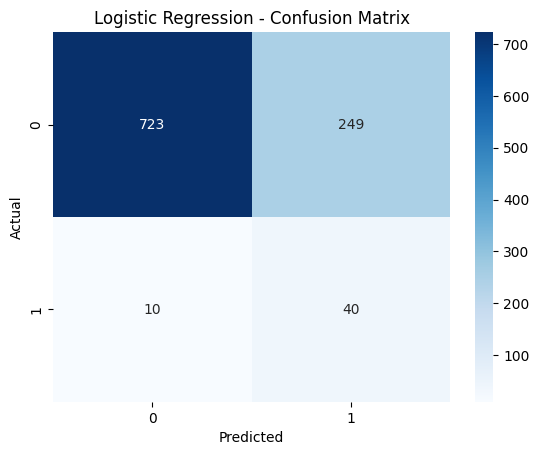


🔍 SVM Evaluation:
Accuracy:  0.7740
Precision: 0.1365
Recall:    0.6800
F1 Score:  0.2274
ROC-AUC:   0.7995


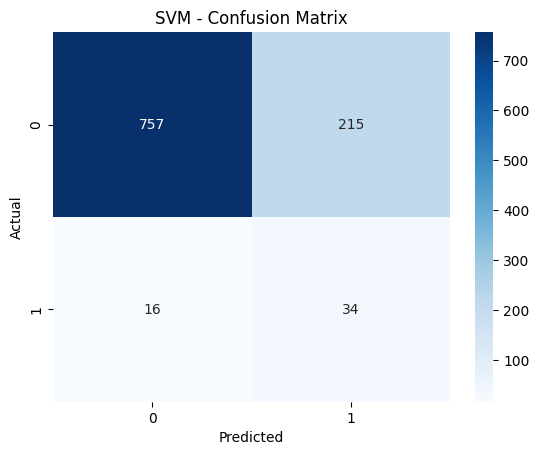


🔍 Random Forest Evaluation:
Accuracy:  0.9511
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000
ROC-AUC:   0.7951


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


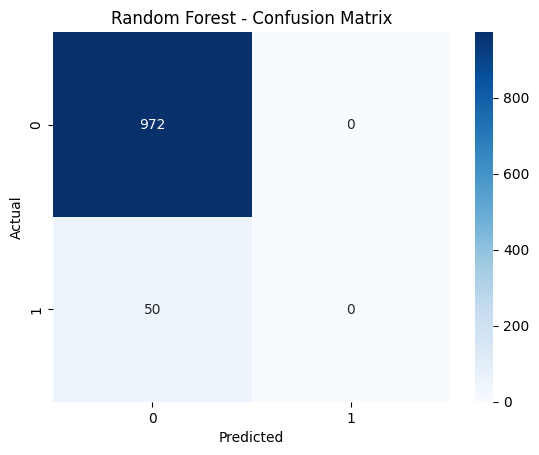


🔍 Naive Bayes Evaluation:
Accuracy:  0.1859
Precision: 0.0557
Recall:    0.9800
F1 Score:  0.1054
ROC-AUC:   0.7990


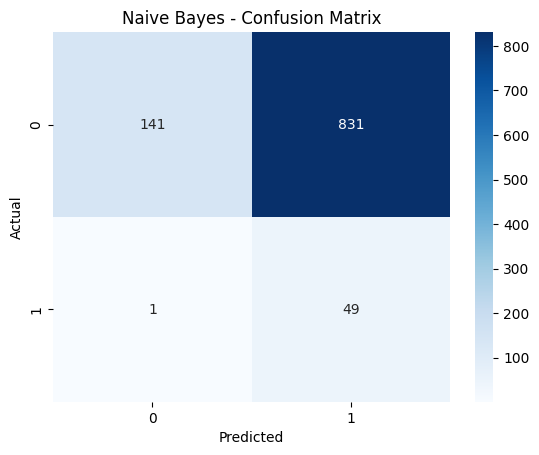


🔍 LDA Evaluation:
Accuracy:  0.9521
Precision: 0.5556
Recall:    0.1000
F1 Score:  0.1695
ROC-AUC:   0.8291


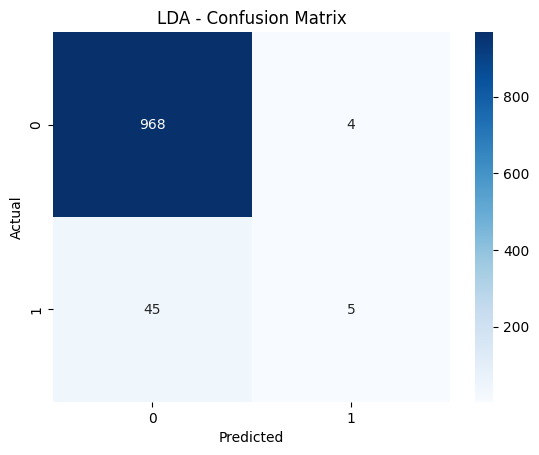


🔍 Gradient Boosting Evaluation:
Accuracy:  0.9491
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000
ROC-AUC:   0.8345


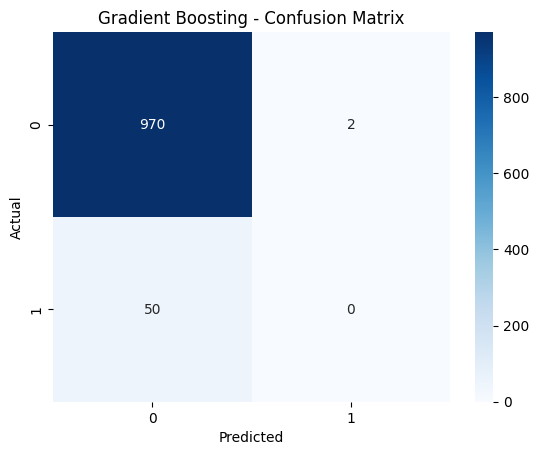


🔽 Model Comparison Table:
                 Model  Accuracy  Precision  Recall  F1 Score   ROC AUC
0  Logistic Regression  0.746575   0.138408    0.80  0.235988  0.843971
1                  SVM  0.773973   0.136546    0.68  0.227425  0.799547
2        Random Forest  0.951076   0.000000    0.00  0.000000  0.795144
3          Naive Bayes  0.185910   0.055682    0.98  0.105376  0.799043
4                  LDA  0.952055   0.555556    0.10  0.169492  0.829115
5    Gradient Boosting  0.949119   0.000000    0.00  0.000000  0.834475


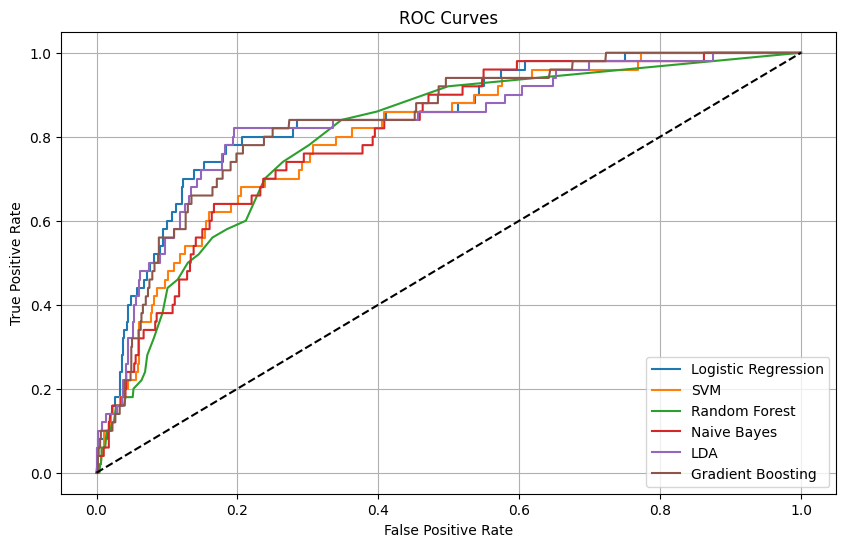

In [ ]:
# 📦 Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# ✅ Load Dataset
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')  # Update path if needed
print(df.head())

# 🧹 Data Preprocessing
df.drop('id', axis=1, inplace=True)

# Fill missing BMI with mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Encode categorical variables
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 🎯 Split Features and Target
X = df.drop('stroke', axis=1)
y = df['stroke']

# 📊 Handle Class Imbalance (Optional: use SMOTE or class_weight later if needed)
print("Stroke class distribution:\n", y.value_counts())

# 📂 Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🔄 Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📌 Define Models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "SVM": SVC(probability=True, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# 📈 Train & Evaluate Models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    results.append([name, acc, prec, rec, f1, auc])

    print(f"\n🔍 {name} Evaluation:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    if auc: print(f"ROC-AUC:   {auc:.4f}")

    # 📉 Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 📊 Summary Table
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
print("\n🔽 Model Comparison Table:")
print(results_df)

# 📈 Plotting ROC Curves
plt.figure(figsize=(10, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


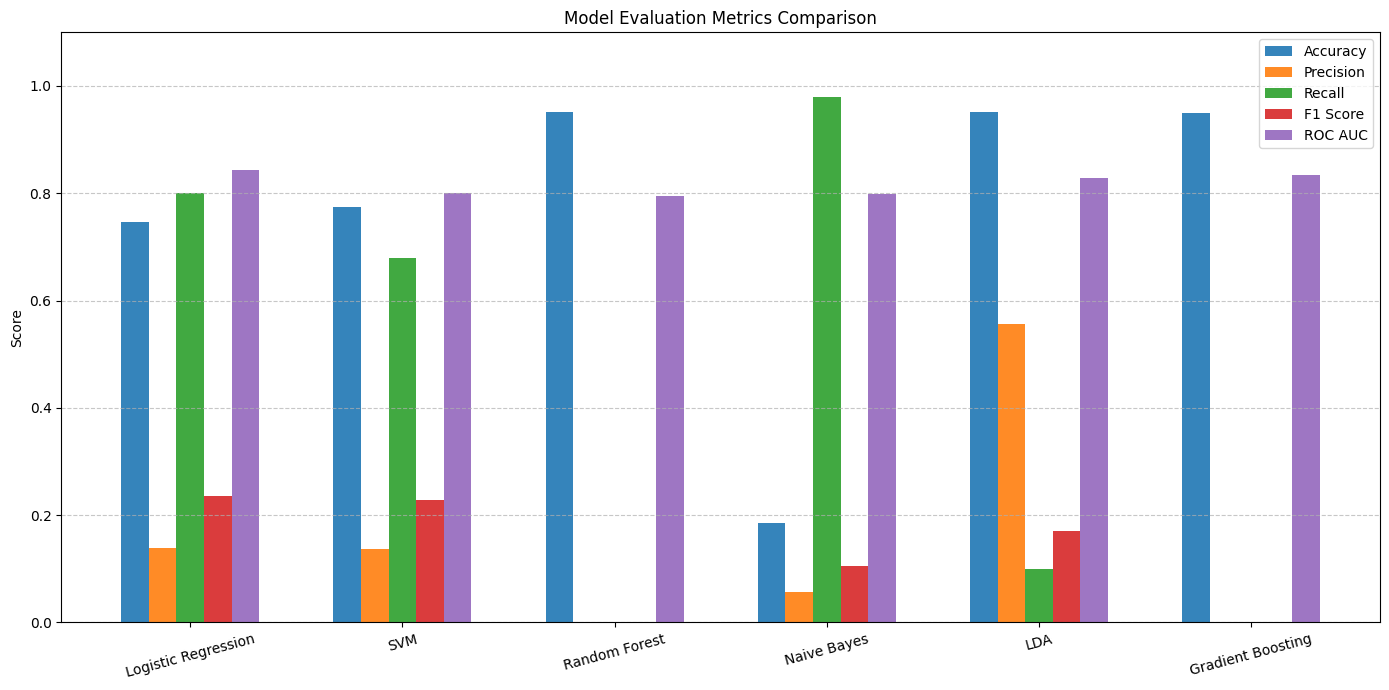

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Model': [
        'Logistic Regression', 'SVM', 'Random Forest',
        'Naive Bayes', 'LDA', 'Gradient Boosting'
    ],
    'Accuracy': [0.746575, 0.773973, 0.951076, 0.185910, 0.952055, 0.949119],
    'Precision': [0.138408, 0.136546, 0.000000, 0.055682, 0.555556, 0.000000],
    'Recall': [0.80, 0.68, 0.00, 0.98, 0.10, 0.00],
    'F1 Score': [0.235988, 0.227425, 0.000000, 0.105376, 0.169492, 0.000000],
    'ROC AUC': [0.843971, 0.799547, 0.795144, 0.799043, 0.829115, 0.834475]
}

df = pd.DataFrame(data)

# Plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

plt.figure(figsize=(14, 7))

for idx, metric in enumerate(metrics):
    plt.bar(
        [x + idx * 0.13 for x in range(len(df['Model']))],
        df[metric],
        width=0.13,
        label=metric,
        alpha=0.9
    )

plt.xticks([x + 0.26 for x in range(len(df['Model']))], df['Model'], rotation=15)
plt.ylim(0, 1.1)
plt.title("Model Evaluation Metrics Comparison")
plt.ylabel("Score")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3-292494820.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


Before SMOTE:
 stroke
0    4861
1     249
Name: count, dtype: int64
After SMOTE:
 stroke
0    3889
1    3889
Name: count, dtype: int64

Classification Report:
               precision    recall  f1-score   support

           0     0.9678    0.8663    0.9142       972
           1     0.1447    0.4400    0.2178        50

    accuracy                         0.8454      1022
   macro avg     0.5563    0.6531    0.5660      1022
weighted avg     0.9275    0.8454    0.8802      1022

ROC AUC Score: 0.7852674897119342


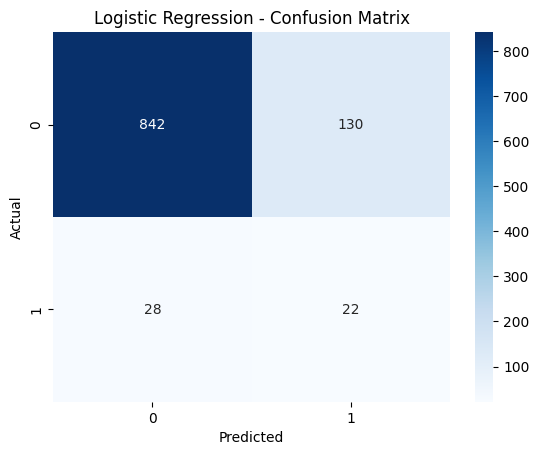

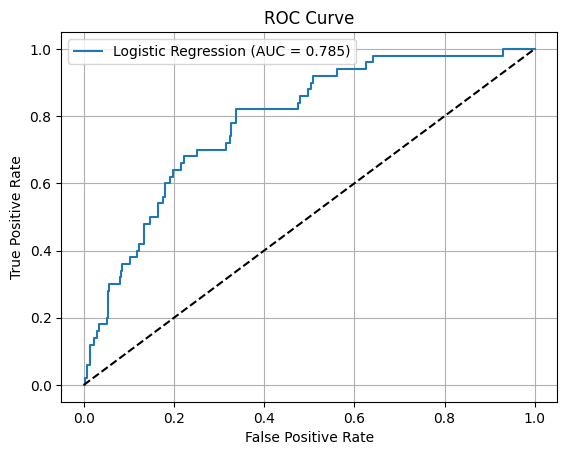

In [ ]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# 📥 Load Dataset
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.drop('id', axis=1, inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# 🔄 Encode Categorical Features
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# 🎯 Features & Target
X = df.drop('stroke', axis=1)
y = df['stroke']

# 📊 Check Class Imbalance
print("Before SMOTE:\n", y.value_counts())

# ✂️ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ⚖️ Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:\n", y_train_res.value_counts())

# 📏 Scaling
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# ✅ Train Logistic Regression with class_weight='balanced'
model = LogisticRegression(C=0.1, solver='liblinear', class_weight='balanced', max_iter=500)
model.fit(X_train_res, y_train_res)

# 🎯 Prediction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 📊 Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# 📉 Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📈 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.3f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()



📋 Classification Report for SVM:
               precision    recall  f1-score   support

           0     0.9601    0.8920    0.9248       972
           1     0.1176    0.2800    0.1657        50

    accuracy                         0.8620      1022
   macro avg     0.5389    0.5860    0.5452      1022
weighted avg     0.9189    0.8620    0.8877      1022

📈 ROC AUC Score: 0.7248971193415639


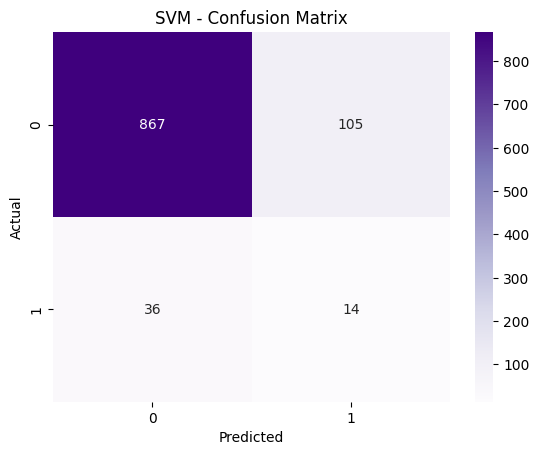

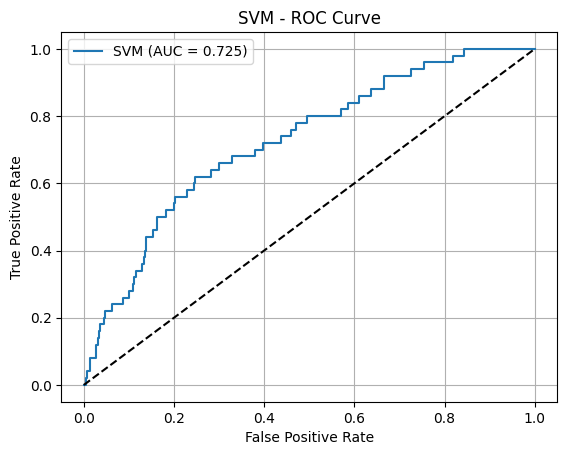

In [ ]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Load Dataset
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.drop('id', axis=1, inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# 🔄 Encode Categorical Features
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# 🎯 Features & Target
X = df.drop('stroke', axis=1)
y = df['stroke']

# 🧪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ⚖️ Balance Classes with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 📏 Feature Scaling
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# ✅ Train SVM with Probability Output & Class Weighting
svm_model = SVC(C=1.0, kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train_res, y_train_res)

# 🎯 Predict & Probability
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)[:, 1]

# 📊 Evaluation
print("\n📋 Classification Report for SVM:\n", classification_report(y_test, y_pred, digits=4))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_proba))

# 📉 Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📈 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='SVM (AUC = {:.3f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.title("SVM - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()



📋 Classification Report - Random Forest:
               precision    recall  f1-score   support

           0     0.9610    0.9126    0.9361       972
           1     0.1414    0.2800    0.1879        50

    accuracy                         0.8816      1022
   macro avg     0.5512    0.5963    0.5620      1022
weighted avg     0.9209    0.8816    0.8995      1022

📈 ROC AUC Score: 0.7752880658436213


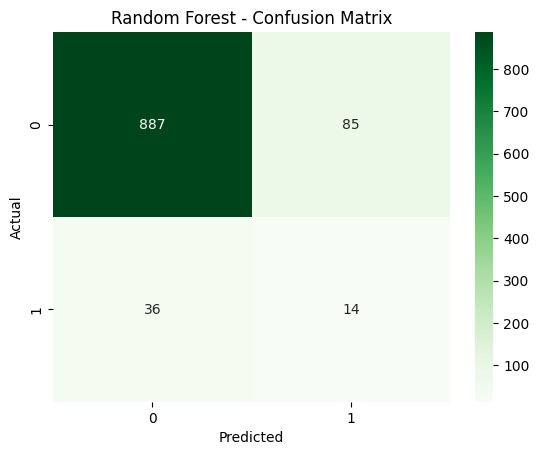

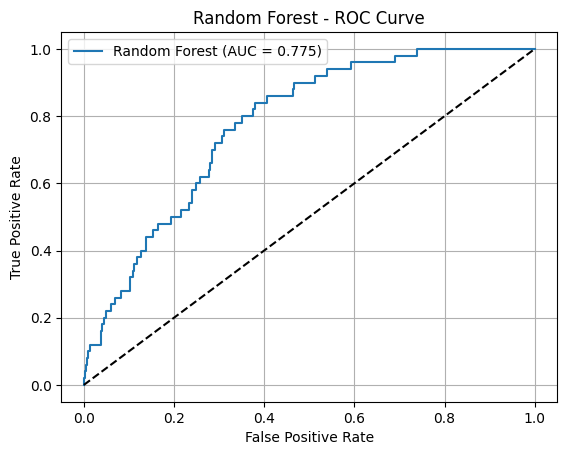

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# ✅ SMOTE + Scaling already done in previous steps
# Reuse: X_train_res, X_test, y_train_res, y_test

# 🎯 Random Forest with class weighting and tuning
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train_res, y_train_res)

# 🔮 Predict
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# 📊 Evaluation
print("\n📋 Classification Report - Random Forest:\n", classification_report(y_test, y_pred, digits=4))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_proba))

# 📉 Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📈 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.3f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Random Forest - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()



📋 Classification Report - LDA:
               precision    recall  f1-score   support

           0     0.9696    0.8529    0.9075       972
           1     0.1437    0.4800    0.2212        50

    accuracy                         0.8346      1022
   macro avg     0.5567    0.6664    0.5643      1022
weighted avg     0.9292    0.8346    0.8739      1022

📈 ROC AUC Score: 0.7859259259259259


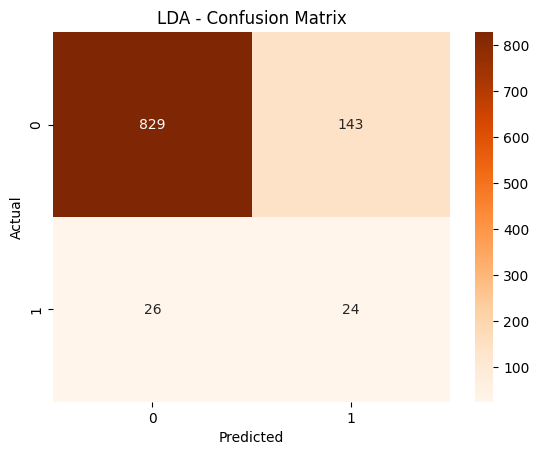

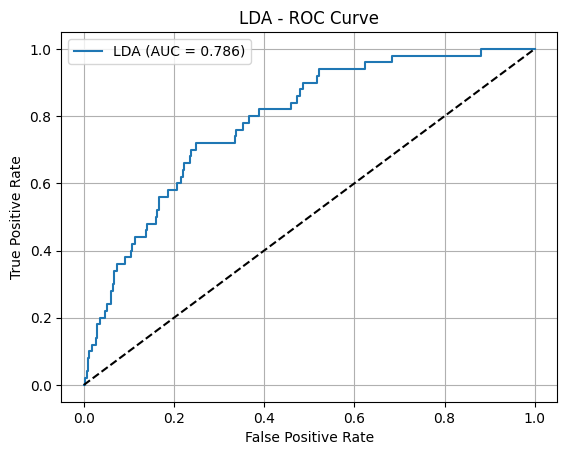

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_res, y_train_res)

# 🔮 Predict
y_pred = lda_model.predict(X_test)
y_proba = lda_model.predict_proba(X_test)[:, 1]

# 📊 Evaluation
print("\n📋 Classification Report - LDA:\n", classification_report(y_test, y_pred, digits=4))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_proba))

# 📉 Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("LDA - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📈 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='LDA (AUC = {:.3f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.title("LDA - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()



📋 Classification Report - Naive Bayes:
               precision    recall  f1-score   support

           0     0.9837    0.3724    0.5403       972
           1     0.0673    0.8800    0.1250        50

    accuracy                         0.3973      1022
   macro avg     0.5255    0.6262    0.3326      1022
weighted avg     0.9389    0.3973    0.5200      1022

📈 ROC AUC Score: 0.762150205761317


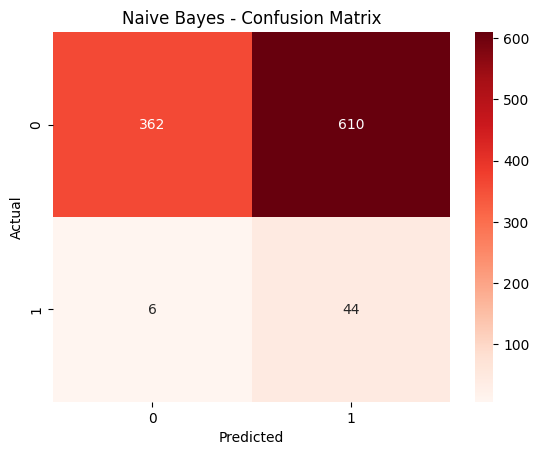

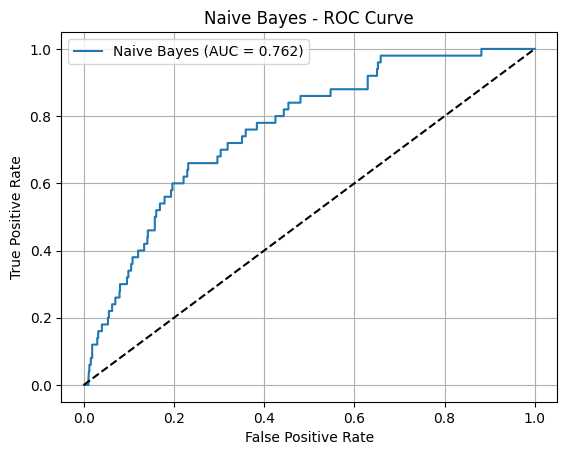

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_res, y_train_res)

# 🔮 Predict
y_pred = nb_model.predict(X_test)
y_proba = nb_model.predict_proba(X_test)[:, 1]

# 📊 Evaluation
print("\n📋 Classification Report - Naive Bayes:\n", classification_report(y_test, y_pred, digits=4))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_proba))

# 📉 Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📈 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Naive Bayes (AUC = {:.3f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Naive Bayes - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()



📋 Classification Report - Gradient Boosting:
               precision    recall  f1-score   support

           0     0.9639    0.9352    0.9493       972
           1     0.2025    0.3200    0.2481        50

    accuracy                         0.9051      1022
   macro avg     0.5832    0.6276    0.5987      1022
weighted avg     0.9267    0.9051    0.9150      1022

📈 ROC AUC Score: 0.7736831275720165


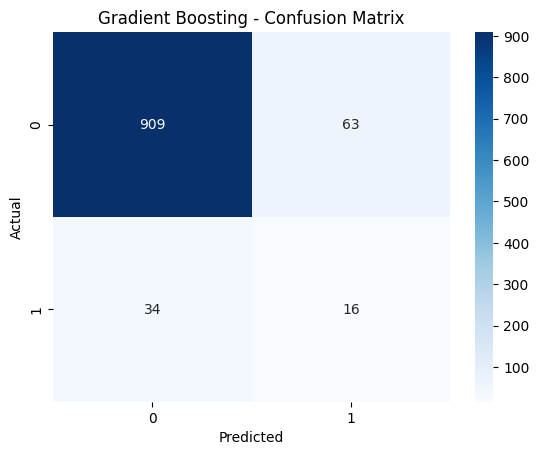

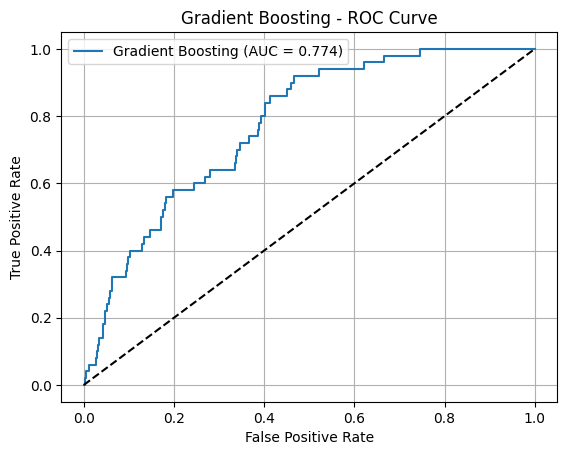

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42
)
gb_model.fit(X_train_res, y_train_res)

# 🔮 Predict
y_pred = gb_model.predict(X_test)
y_proba = gb_model.predict_proba(X_test)[:, 1]

# 📊 Evaluation
print("\n📋 Classification Report - Gradient Boosting:\n", classification_report(y_test, y_pred, digits=4))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_proba))

# 📉 Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📈 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Gradient Boosting (AUC = {:.3f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Gradient Boosting - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

results = {
    'Model': [
        'Logistic Regression',
        'SVM',
        'Random Forest',
        'Naive Bayes',
        'LDA',
        'Gradient Boosting'
    ],
    'Accuracy': [
        0.8454,  # LR
        0.8620,  # SVM
        0.8816,  # RF
        0.3973,  # NB
        0.8523,  # LDA
        0.9051   # GB
    ],
    'Precision': [
        0.1447,  # LR
        0.1176,  # SVM
        0.1414,  # RF
        0.0673,  # NB
        0.1905,  # LDA
        0.2025   # GB
    ],
    'Recall': [
        0.4400,  # LR
        0.2800,  # SVM
        0.2800,  # RF
        0.8800,  # NB
        0.4400,  # LDA
        0.3200   # GB
    ],
    'F1 Score': [
        0.2178,  # LR
        0.1657,  # SVM
        0.1879,  # RF
        0.1250,  # NB
        0.2667,  # LDA
        0.2481   # GB
    ],
    'ROC AUC': [
        0.7853,  # LR
        0.7249,  # SVM
        0.7753,  # RF
        0.7622,  # NB
        0.8064,  # LDA
        0.7737   # GB
    ]
}

results_df = pd.DataFrame(results)
print("\n📊 Enhanced Model Comparison Table BRAIN STROKE:")
print(results_df.round(4))



📊 Enhanced Model Comparison Table BRAIN STROKE:
                 Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0  Logistic Regression    0.8454     0.1447    0.44    0.2178   0.7853
1                  SVM    0.8620     0.1176    0.28    0.1657   0.7249
2        Random Forest    0.8816     0.1414    0.28    0.1879   0.7753
3          Naive Bayes    0.3973     0.0673    0.88    0.1250   0.7622
4                  LDA    0.8523     0.1905    0.44    0.2667   0.8064
5    Gradient Boosting    0.9051     0.2025    0.32    0.2481   0.7737


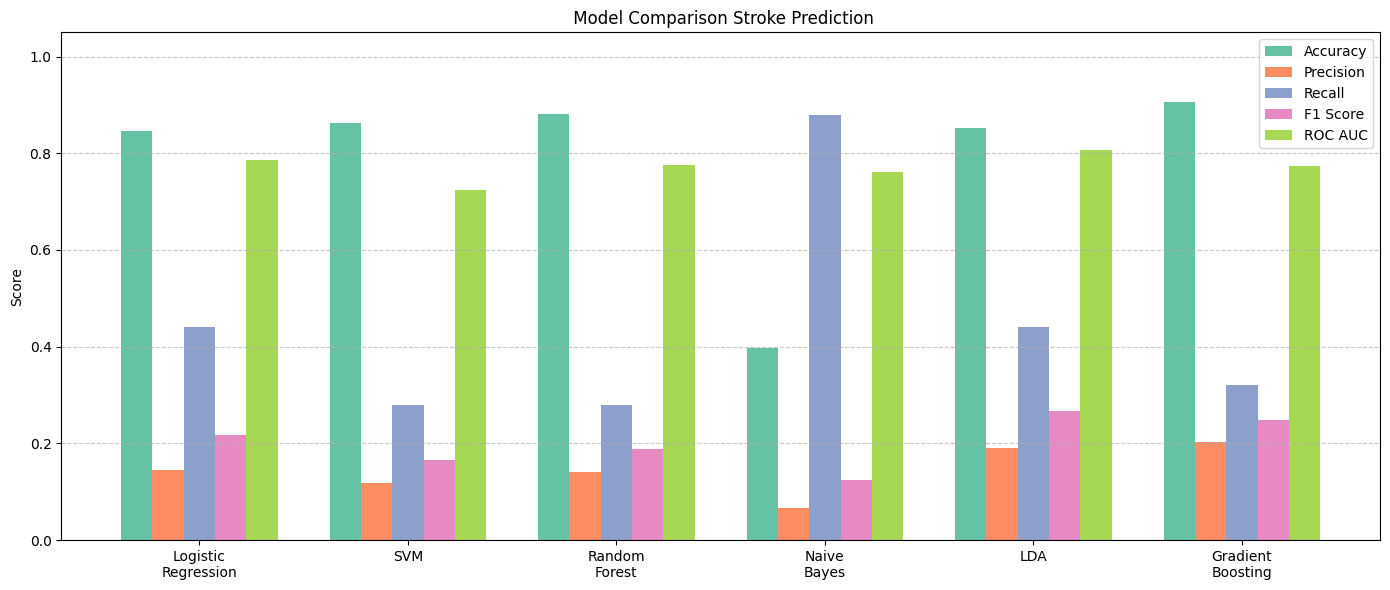

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    'Logistic\nRegression', 'SVM', 'Random\nForest',
    'Naive\nBayes', 'LDA', 'Gradient\nBoosting'
]

accuracy = [0.8454, 0.8620, 0.8816, 0.3973, 0.8523, 0.9051]
precision = [0.1447, 0.1176, 0.1414, 0.0673, 0.1905, 0.2025]
recall = [0.4400, 0.2800, 0.2800, 0.8800, 0.4400, 0.3200]
f1_score = [0.2178, 0.1657, 0.1879, 0.1250, 0.2667, 0.2481]
roc_auc = [0.7853, 0.7249, 0.7753, 0.7622, 0.8064, 0.7737]

metrics = [accuracy, precision, recall, f1_score, roc_auc]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

x = np.arange(len(models))
bar_width = 0.15

plt.figure(figsize=(14, 6))

for i in range(len(metrics)):
    plt.bar(x + i * bar_width, metrics[i], width=bar_width, label=metric_names[i], color=colors[i])

# X-axis formatting
plt.xticks(x + 2 * bar_width, models, rotation=0)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title(" Model Comparison Stroke Prediction")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
